# **Знакомство с Pandas**

Прочитайте данные с помощью метода read_html из таблицы "Коефіцієнт народжуваності в регіонах України (1950—2019)" по ссылке

In [2]:
import pandas as pd

df = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C", thousands= " ", match = "Регіон", attrs={"class": "wikitable collapsible collapsed"})[0]


Вывести первые строки таблицы с помощью метода head



In [3]:
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,"23,0","20,6","16,0","13,0","7,3","12,6",—,—
1,Вінницька,"22,4","19,2","14,2","12,4","8,4","11,2","10,9","7,6"
2,Волинська,"24,7","25,0","17,9","15,3","11,2","14,8","14,1","10,1"
3,Дніпропетровська,"20,4","20,4","15,1","12,3","7,1","11,2","11,1","7,1"
4,Донецька,"27,1","21,4","14,0","10,9","6,1","9,8","8,2",—


Определите количество строк и столбцов в датафрейме (атрибут shape)

In [4]:
df.shape

(28, 9)

Замените в таблице значения "—" на значения NaN

In [5]:
import numpy as np

df = df.replace('—', np.nan)
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,"23,0","20,6","16,0","13,0","7,3","12,6",NaN,NaN
1,Вінницька,"22,4","19,2","14,2","12,4","8,4","11,2","10,9","7,6"
2,Волинська,"24,7","25,0","17,9","15,3","11,2","14,8","14,1","10,1"
3,Дніпропетровська,"20,4","20,4","15,1","12,3","7,1","11,2","11,1","7,1"
4,Донецька,"27,1","21,4","14,0","10,9","6,1","9,8","8,2",NaN


Определите типы всех столбцов с помощью dataframe.dtypes

In [6]:
df.dtypes

Регіон    object
1950      object
1960      object
1970      object
1990      object
2000      object
2012      object
2014      object
2019      object
dtype: object

Замените типы не числовых колонок на числовые.

In [7]:
#for colum in df.columns[1:]:
#  df[colum] = df[colum].str.replace(',', '.').astype(float)

df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: float(str(x).replace(',', '.'))).astype(float)


In [8]:
print(df.dtypes)
df.head(5)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)

In [9]:
null_counts = df.isnull().sum()
total_counts = len(df)
null_fractions = null_counts / total_counts

print(null_fractions)

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


Удалите из таблицы данные по всей стране, последняя строчка таблицы

In [10]:
df = df.drop(index=df.index[-1])

df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)

In [11]:
#for colum in df.columns[1:]:
#  df[colum] = df[colum].fillna(df[colum].mean())

df.fillna(df.mean(), inplace=True)
  
df.head(5)

<ipython-input-11-548b60d9f086>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.200,8.017391


Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине

In [12]:
mean_birth_rate = df['2019'].mean()

regions_above_mean = df.loc[df['2019'] > mean_birth_rate, 'Регіон'].tolist()

print(regions_above_mean)

['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


В каком регионе была самая высокая рождаемость в 2014 году?

In [13]:
idxmax = df['2014'].idxmax()

highest_birth_rate_region = df.loc[idxmax, 'Регіон']

print(f"Самая высокая рождаемость в 2014 году была в {highest_birth_rate_region}")

Самая высокая рождаемость в 2014 году была в Рівненська


Постройте столбцовую диаграмму рождаемости по регионам в 2019 году

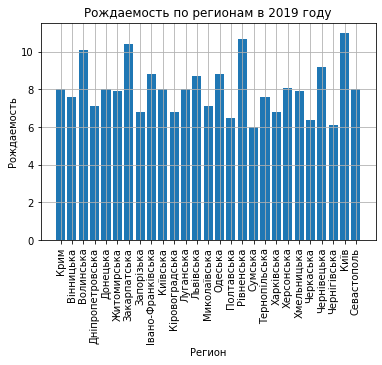

In [14]:
import matplotlib.pyplot as plt

birth_rates_2019 = df.loc[:, ['Регіон', '2019']]

plt.bar(birth_rates_2019['Регіон'], birth_rates_2019['2019'])
plt.title('Рождаемость по регионам в 2019 году')
plt.xlabel('Регион')
plt.xticks(rotation=90)
plt.ylabel('Рождаемость')
plt.grid(True)
plt.show()

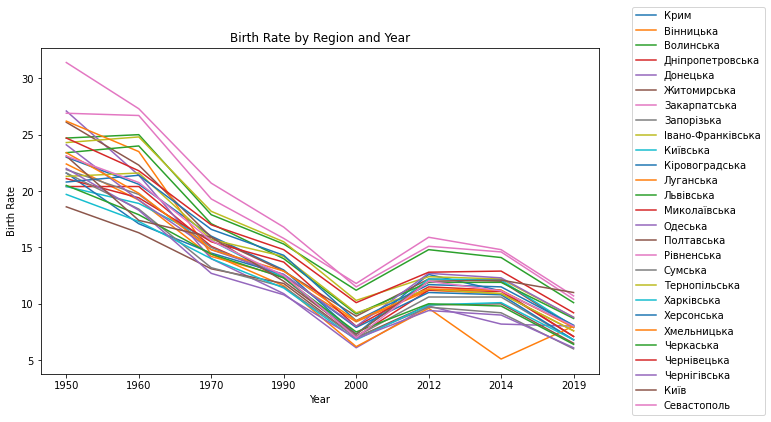

In [33]:

years = df.columns[1:].tolist()

plt.figure(figsize=(10, 6))
plt.title('Рождаемость по регионам и годам')
plt.xlabel('Год')
plt.ylabel('Уровень рождаемости')

for region in df['Регіон']:
    plt.plot(years, df[df['Регіон'] == region][years].values.flatten(), label=region)

plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()

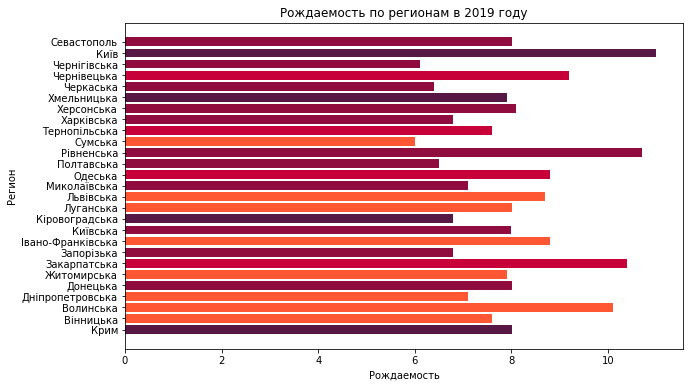

In [42]:
import random

# Получаем значения рождаемости в 2019 году
birth_rates = df['2019']

# Задаем параметры графика
plt.figure(figsize=(10, 6))
plt.title('Рождаемость по регионам в 2019 году')
plt.xlabel('Рождаемость')
plt.ylabel('Регион')

# Строим гистограмму рождаемости по регионам
plt.barh(df['Регіон'], birth_rates, color=[random.choice(['#FF5733', '#C70039', '#900C3F', '#581845']) for _ in df['Регіон']])

# Выводим график на экран
plt.show()

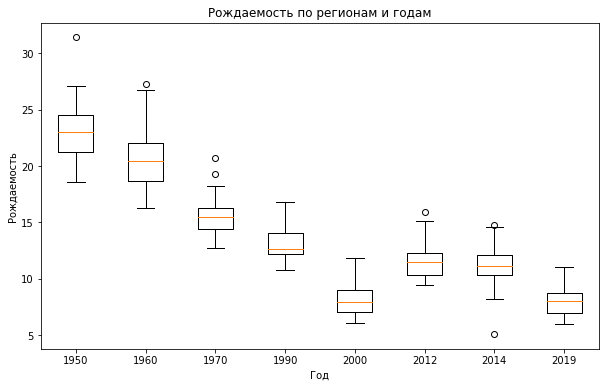

In [38]:
# Получаем значения рождаемости по годам
years = df.columns[1:].tolist()
birth_rates_by_year = [df[year] for year in years]

# Задаем параметры графика
plt.figure(figsize=(10, 6))
plt.title('Рождаемость по регионам и годам')
plt.xlabel('Год')
plt.ylabel('Рождаемость')

# Строим ящик с усами рождаемости по регионам в разные годы
plt.boxplot(birth_rates_by_year, labels=years)

# Выводим график на экран
plt.show()